# Growth and Rates Analysis

- Introduction
- Simple lagged correlations
- Stationarity/co-integration testing
- GARCH parameter sweep
- ...
- Notes, sources, reality checks

I love this subject. There's always an agnotological skirting-around tinfoliy hattedness to the discussions I have around it with friends and acquaintences, which is always fun. The agno-angle comes from the fact that it's common knowledge that interest rates are adjusted in order to influnece GDP growth, and to question such well understood laws of the economy, these chats always begin with surprise. The significance of central bank activity has become widely understood over the last few decades but the nature of it's activities and consequences are not. The influnece of rates on growth is a subject squarely in the category of misunderstood activity and consequence and as such, the reality of this growth-and-rates interaction, while not in complete contradiction with theory, is hidden behind first-principles smokescreens and statistical mirages.

Across pretty much all of the schools of economics, it's understood that changes to the official interest rate set by the central bank influneces the vigour of economic activity and by extension, GDP growth that follows. This theoretical understanding is surmised and manifest in the pragmatic form of monetary policy. According to this theory, given we wish to keep broad economic volatility withing certain bounds, when the economy gets too hot, the central bank ought to raise rates in order to cool down an economy that may otherwise overheat. And to counter the contrary risk of deflationary stagnation, reducing the rate hypothetically stimulates a lethargic economy.

[The claim](https://www.sciencedirect.com/science/article/pii/S0921800916307510?via%3Dihub#fn0030) i'm exploring here is that while rates and growth change are related, that relation is not quite the relation asserted by orthodox theory. There's two ways in which the orthodox understanding appears incorrect. Firstly, the immediate correlations appear to be resoundingly positive (rate up $\leftrightarrow$ growth up, rate down $\leftrightarrow$ growth down) and secondly, even worse, any causality between the two appears to go in the direction opposite to what is expected (changing rates doesn't appear to influence growth, growth appears to influence rates!). If the claim is true, then does it mean that monetary policy more or less amounts to chasing ghosts? It's not immediately clear, but we can take a look at some data to assess whether or not the claim is even plausible... 

In [1]:
import pickle
from utilities import *

In [2]:
# --- Dataset Labels
labels = [
    "de_annually", "de_quarterly",
    "jp",
    "uk_annually", "uk_quarterly",
    "us_annually", "us_quarterly"
]
data = grab_data(labels)

In [3]:
# --- Create delta GDP
append_yoy_dgdp(data, labels)

In [4]:
data["us_quarterly"].head(3)

,gdp,rate,dgdp
date,,,
1953-07-01,391.7,3.11,-0.013275
1953-10-01,386.5,2.87,-0.001552
1954-01-01,385.9,2.59,0.002073


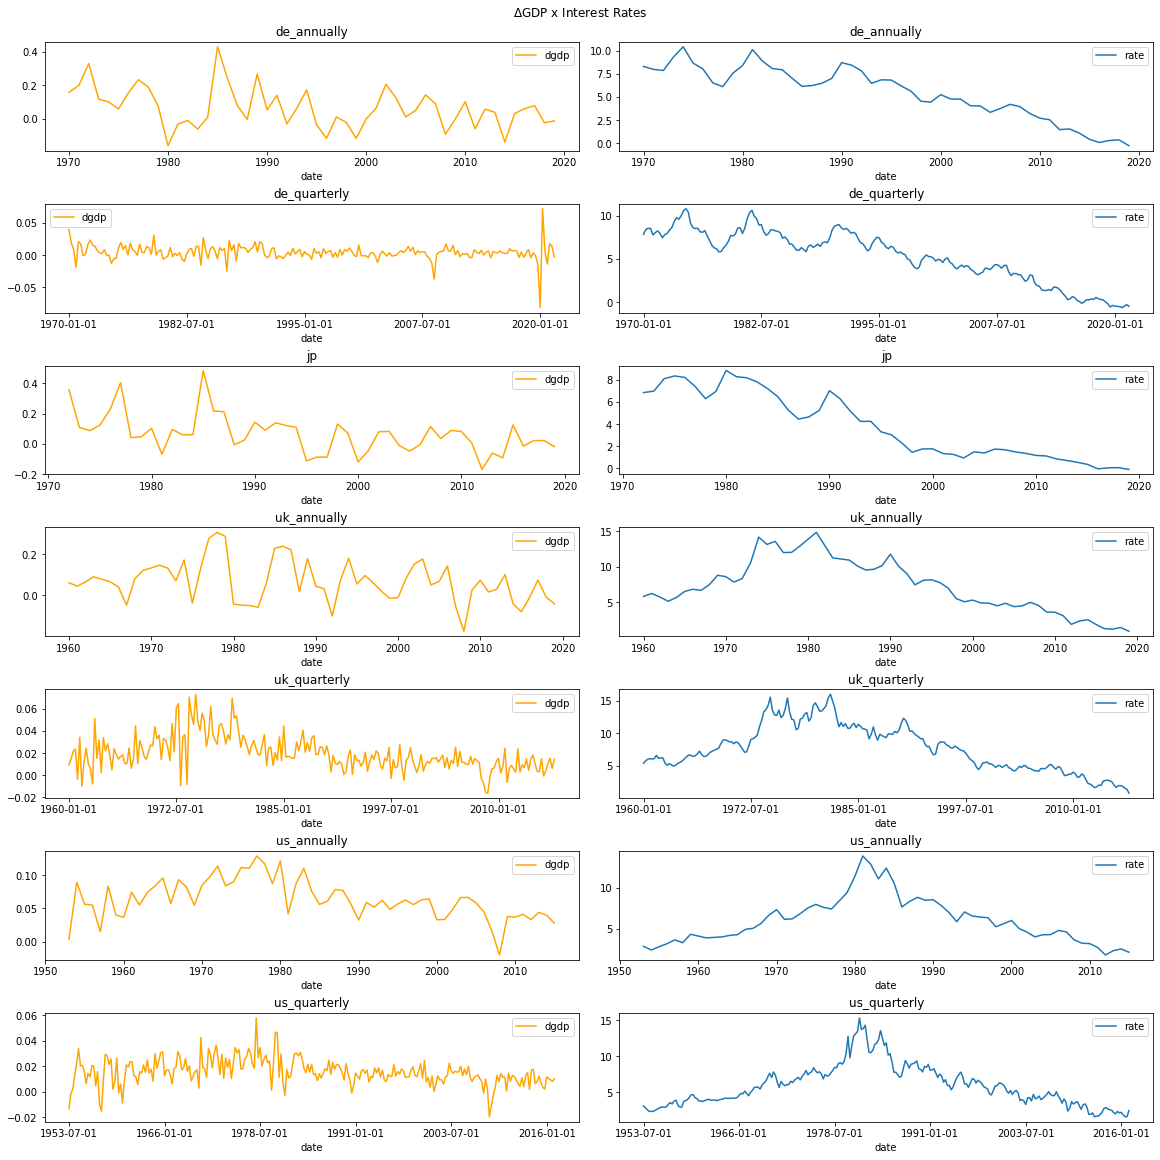

In [53]:
_, ax = plt.subplots(len(labels), 2, figsize=(16, 16), constrained_layout=True)
# _, ax = plt.subplots(constrained_layout=True)
_.suptitle("$\Delta$GDP x Interest Rates",)
        
for i, d in enumerate(labels):
    data[d].dropna().plot(y="dgdp", ax=ax[i][0], c="orange")
    data[d].dropna().plot(y="rate", ax=ax[i][1], title=d)
    ax[i][0].set(title=d)

1. Are we chasing ghosts?
2. When are they best correlated?

,de_annually,de_quarterly,jp,uk_annually,uk_quarterly,us_annually,us_quarterly
-4,0.39391,0.145617,0.538716,0.42094,0.605684,0.704101,0.412237
-3,0.357146,0.15646,0.5016,0.426937,0.599798,0.64656,0.394714
-2,0.299931,0.138562,0.418729,0.377659,0.583667,0.612164,0.386842
-1,0.250987,0.116217,0.409097,0.338444,0.581655,0.553875,0.325505
0,0.224189,0.094353,0.473655,0.297481,0.568659,0.431359,0.290792
1,0.239476,0.067649,0.482532,0.254894,0.548155,0.377331,0.285547
2,0.286588,0.065257,0.520439,0.296519,0.53184,0.388469,0.272753
3,0.30393,0.06404,0.493658,0.359515,0.522022,0.326134,0.254899
4,0.309349,0.080417,0.419499,0.365869,0.505552,0.245927,0.263878


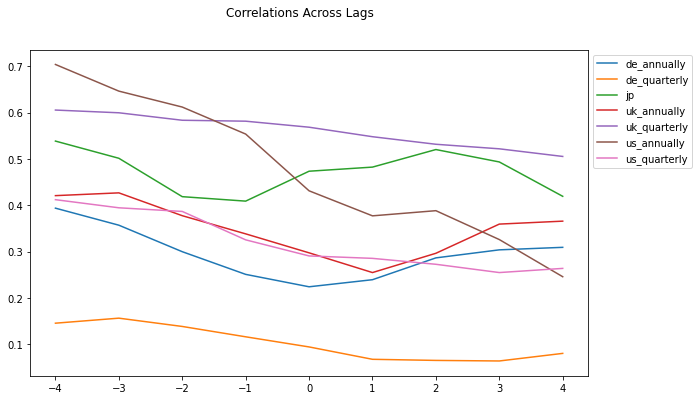

In [52]:
# --- Calculate Correlations for multiple lags
corrs, dfs = produce_correlations_with_lags(data, labels, lags=4);
_, ax = plt.subplots(1, figsize=(10, 6))
corrs.plot(ax=ax);
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
_.suptitle("Correlations Across Lags")
display(corrs)

The first notable thing is that all the correlations are positive. While there are some problems with correlating the series we're working with in this direct manner (will be dealt with) it's still sort of surprising that all correlation are not just positive, but very positive! It suggests that where rates are raised, corresponding GDP growths doesn't seem to be lower and where rates are dropped GDP growth doesn't appear to increase.
 
`pd.series.shift(1)` moves the series forward one timestep. Since we're shifting the rates, positive shifts (lag > 0) correspond to bringing the rates forward in time. Negative shifts correspond to bringing rates backwards in time.

With the exception of japan, it's quite clear that there is a general tendency for correlations to decrease across the lags $[-4, 4]$. This implies that rates are best correlated with GDP growth when pulled back in time, that is, at any point in time the change of interest rate at that moment generally corresponds best to a GDP change that has already happened. That is, changes to rates occur after changes to GDP. If we assume there is a causal connection between the two series then to think that rate changes cause GDP changes would be dubitable. If we assume a causal connection then the correlations suggest that the flow of cause and effect goes from GDP change to rate change.

(Side note, japan is the only dataset that I couldn't find a clean, long-term, nominal datset for unlike all the other data. The best I could find was clean, long, but denoted in USD.)

From one point of view, this seems incongruous: We are told that monetary policy utilises theory around prices to behave as a counterbalancing force to how frenetic or lethargic the economy is. If however, as the above plot suggests, GDP growth preceeds changes the corresponding change in rates, then what is the change of rate achieving? From another perspective, the fact of these correlations make sense: Central banks adjust rates in response to the economic climate. Since rate adjustments are reactionary, GDP change which is the proxy will naturally preceed rate changes. But however you look at it, the purpose of the rate change remains sort of inexplicable.

So, we have to note two significant things. First, that most of the correlations aren't even close to being negative. Second, that lagged correlations suggest we have the direction of causality wrong. 
While this is all compelling, a simple linear comparsion is actually not quite approriate. The fact of non-stationarity is an issue that must be addressed. [link to spurious regression]

In [8]:
stationarity_results = display_test_results(data, labels)

,cointegrated,coint statistic,coint pval
de_annually,H0 rejected,-2.685858,0.204706
de_quarterly,H0 rejected,-3.006112,0.10876
jp,H0 rejected,-3.324367,0.051473
uk_annually,H0 not rejected,-2.337737,0.354881
uk_quarterly,H0 not rejected,-1.820733,0.619598
us_annually,H0 not rejected,-0.13385,0.982257
us_quarterly,H0 not rejected,-0.117566,0.982763


,stat statistic,stat pval
de_annually-dgdp,-4.798641,0.000055
de_annually-rate,-0.151722,0.944037
de_quarterly-dgdp,-5.8392,0.0
de_quarterly-rate,-0.644362,0.86064
jp-dgdp,-4.981236,0.000024
jp-rate,-0.839983,0.807095
uk_annually-dgdp,-4.605871,0.000126
uk_annually-rate,-0.513646,0.889326
uk_quarterly-dgdp,-1.393807,0.585241
uk_quarterly-rate,-0.535525,0.884896


All cointegration tests rejected reject the null hypothesis, Thus there is plausibly cointegration in all of the pairs. The US and UK pairs cleanly reject the null hypothesis whereas the JP and DE pairs are rejected with less enthusiasm. For [a more potentially appropriate significant p-value selection](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6099145/), it's actually reasonable to not reject the quarterly German data japanese data as not cointegrated (so, "there is no cointegration"). I'm going to act on a 25% threshold for p-value rejection regarding the cointegration tests. That is all to say, the linear correlations from earlier are appropriate for the UK and US pairs. Not so for the japanese and german, hence the rejections and non rejections in the dataframe above

## Conclusion - for the time being

There's some correlations there which we can't take at face value, but for the most part, the direct correlations are acceptable and suggest that GDP change preceeds interest rate change. The next step here would be to check out the Granger causality, but for the sake of a streamlined narrative, I want to postpone this until after i've built a DCC-GARCH model of the pairs that aren't cointegrated.


## Tasks for the near future
1. Build a DCC-Garch tool
2. Do a granger causality analysis

In [11]:
# --- Difference JP and DE pairs

to_difference = ["jp", "de_annually", "de_quarterly"]

p_diffed = pickle.loads(pickle.dumps(data))
a_diffed = pickle.loads(pickle.dumps(data))

# Percent difference
p_diffed = difference_non_cointegrated(p_diffed, stationarity_results, to_difference, method="percent")
# Abs difference
a_diffed = difference_non_cointegrated(a_diffed, stationarity_results, to_difference, method="abs")

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(12, 8))

p_diffed['de_quarterly'].plot(y="rate", ax=ax[0, 0], title="% diff de_q");
p_diffed['jp'].plot(y="rate", ax=ax[0, 1], title="% diff jp");
a_diffed['de_quarterly'].plot(y="rate", ax=ax[1, 0], title="|.| diff de_q");
a_diffed['jp'].plot(y="rate", ax=ax[1, 1], title="|.| diff jp");
_.tight_layout()

In [ ]:
_, ax = plt.subplots(len(labels), 2, figsize=(24, 24))
for i, d in enumerate(labels):
    p_diffed[d].dropna().plot(y="dgdp", ax=ax[i][0], secondary_y=True)
    p_diffed[d].dropna().plot(y="rate", ax=ax[i][1])
    ax[i][0].set(title=d)

In [ ]:
diff_corrs, diff_dfs = produce_correlations_with_lags(p_diffed, labels, lags=4);

In [ ]:
display(diff_corrs)
_, ax = plt.subplots(1, figsize=(12, 8))
diff_corrs.plot(ax=ax);

### Questions for later

1. $\Delta$GDP calculation

With the initial transformation of nominal gdp to year on year gdp growth rate (equivalent to seasonal log differences). Why this transformation? What happens if you apply different transformations?

2. ARCH fundamentals

Why is it that the errors in my simulated arch series show no autocorrelation, but the squared values do? Is there an intutive interpretation of this?

# Notation Reference

**Unit Roots**
For an AR(1),  $a_t = \phi a_{t-1} + \epsilon$, the expected value of $a_t$ is $\phi^t a_0$ by expanding stuff. 

I think the "root" part of unit root is about the $\phi$. For $|\phi|$ above 1, the timeseries will explode. If it's less than 1, the mean converges to zero. When it equals 1, 

Lags in a unit root corresonds to how many practical values are used to calcualte stationarit?(since you cant expand for all t in practice)

if there is a unit root, you can't immediately apply models. You may need to transfomr them

**Stationarity/Integratedness**
"integrated" should be thought of as being the opposite of "differenced"

- If y is stationary, it is denoted $I(0)$
- If y is non statinoary but 1st diff is, then it is $I(1)$
- If y is non statinoary but 2nd diff is, then it is $I(2)$

# How to garch?

1. undertsand arch ✅
2. understand garch ✅
3. [understand dcc garch](http://users.physik.fu-berlin.de/~kleinert/finance/engle1.pdf)
4. implement/find implementation of arch
5. implement/find implementation of dcc garch

## Sources and information 

[Werner's analysis into the pillars of the orthodox narrative and where it's bunk](https://professorwerner.org/shifting-from-central-planning-to-a-decentralised-economy/)

[Werner's empirical study that i'm imitating](https://www.sciencedirect.com/science/article/pii/S0921800916307510?via%3Dihub#fn0030)

### Specify ARCH model
for a series $S = \{p_1, p_2, ..., p_T\}$
1. $r_t = \sigma_t \epsilon_t$
2. $\epsilon_t \sim \text{white noise 0, 1}$
3. $\sigma_t = \sqrt{\omega + \alpha r^2_{t-1}}$

for return $r_t =\frac{p_t - p_{t-1}}{p_{t-1}}$


ARCH processes:
1. have mean zero
2. are serially uncorrelated
3. have serially corrleated errors

In [ ]:
# --- Quick arch test

def generate_archy_series(q=1, nobs=1000, reveal=True):
    n1 = nobs//10 # nobs to drop
    n2 = nobs + n1
    a = np.random.rand(q+1)
    if reveal: 
        print("Coefficients: {}".format(a))
    epsilon = np.random.normal(0, 1, n2)
    # fit for only q = 1
    ts = [np.random.normal(loc=0, scale=np.sqrt(a[0]/(1-a[1])), size=q)]
    for i in range(1, n2-1):
        ts.append(epsilon[i] * np.sqrt(a[0] + a[1] * ts[i-1]**2))
    return np.array(ts[n1-1:]), a

In [ ]:
ts, a = generate_archy_series()

In [ ]:
_, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(range(1000), ts);

In [ ]:
# --- Check autocorrelation (serial correlation)
_, ax = plt.subplots(2,2, figsize=(12, 8))
ts_acf = acf(ts)
ts_pacf = pacf(ts)
x = range(len(ts_acf))
ax[0,0].plot(x, ts_acf, '.');
ax[0,1].plot(x, ts_pacf, '.');
ts2_acf = acf(ts**2)
ts2_pacf = pacf(ts**2)
ax[1,0].plot(x, ts2_acf, '.');
ax[1,1].plot(x, ts2_pacf, '.');

### to model
estimated with ols
0. Is it arch1 or arch2?
1. estimate parameters
2. 


In [ ]:
am = arch_model(ts)

In [ ]:
res = am.fit()
res.summary()

In [ ]:
a

some info being gerrymandered into a beta that shouldn't be there. Surely the fitting function should place it at zero?

to-do: play with fit function

In [ ]:
def generate_dccy_series(q=1, nobs=1000, reveal=True):
    n1 = nobs//10
    n2 = nobs + n1
    a1 = np.random.rand(q+1)
    a2 = np.random.rand(q+1)
    correlation = np.random.rand()
    if reveal: print("a1: {}\na2: {}\ncorr: {}".format(a1, a2, correlation))
    epsilon1 = np.random.normal(0, 1, n2)
    epsilon2 = correlation * epsilon1 + np.random.normal(0, 1, n2)
    ts1 = [np.random.normal(loc=0, scale=np.sqrt(a1[0]/(1-a1[1])), size=q)]
    ts2 = [np.random.normal(loc=0, scale=np.sqrt(a2[0]/(1-a2[1])), size=q)]
    for i in range(1, n2-1):
        ts1.append(epsilon1[i]*np.sqrt(a1[0] + a1[1] * ts1[i-1]**2))
        ts2.append(epsilon2[i]*np.sqrt(a2[0] + a1[1] * ts2[i-1]**2))
    return np.array(ts1[n1-1:]), np.array(ts2[n1-1:]), a1, a2, correlation

In [ ]:
ts1, ts2, a1, a2, correlation = generate_dccy_series()

In [ ]:
_, ax = plt.subplots(2, 1, figsize=(12, 8))

x = range(len(ts1))
ax[0].plot(x, ts1)
ax[1].plot(x, ts2)

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(12, 8))
ts1_acf, ts2_acf = acf(ts1), acf(ts2)
ts12_acf, ts22_acf = acf(ts1**2), acf(ts2**2)

x_acf = range(len(ts1_acf))
ax[0, 0].plot(x_acf, ts1_acf, '.')
ax[1, 0].plot(x_acf, ts2_acf, '.')
ax[0, 1].plot(x_acf, ts12_acf, '.')
ax[1, 1].plot(x_acf, ts22_acf, '.')